# Explore here

In [81]:
#Imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [84]:
#INPUTS

#STEP 3
col_to_be_dropped=["id","name","host_name","last_review","reviews_per_month"]
#STEP 4
max_col_count_print_flag=10
#STEP 5
var_type_proposal_threshold_ratio = 0.01
set_automatic_var_type = False
# Variable to guess
y="price"
# List of categorical variables
category_var = [
    "host_id",
    "area",
    "neigh",
    "type",
]
# List of numerical variables
numerical_var = [
    "lat",
    "long",
    "min_nights",
    "reviews",
    "host_l_count",
    "available"
]


# Define unit figure sizes
figHeight_unit = 6
figWidth_unit = 10

In [83]:
# Read DataFrame
df_raw=pd.read_csv("/workspaces/exploratory-data-analysis-project/data/raw/internal-link.csv")

# STEP 1) EXPLORING THE DATAFRAME
print("STEP 1) EXPLORING THE DATAFRAME")

print("- Shape of the DataFrame:")
print(str(df_raw.shape))

print("- Content of the DataFrame:")
display(df_raw.head(5))

print("- Info of the DataFrame (dataType and non-nul values):")
display(df_raw.info())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 2) FIND DUPLICATES
print("STEP 2) FIND DUPLICATES")

num_duplicates=df_raw.duplicated().sum()
if num_duplicates == 0:
    df_S2=df_raw
    print("- Raw DataFrame does not contain duplicates\n")
else:
    df_S2_duplicates=df[df_raw.duplicated()] #Works as bool mask
    df_S2=df_raw.drop_duplicates()
    print("- Raw DataFrame contained " + str(num_duplicates) + " duplicates that have been dropped\n")

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 3) SELECT RELEVANT ATTRIBUTES AND RENAME THEM FOR BETTER FITTING
print("STEP 3) SELECT RELEVANT ATTRIBUTES AND RENAME THEM FOR BETTER FITTING")

df_S3=df_S2.drop(col_to_be_dropped, axis=1)

df_S3=df_S3.rename(columns={
    "neighbourhood_group": "area",
    "neighbourhood": "neigh",
    "latitude": "lat",
    "longitude": "long",
    "room_type": "type",
    "calculated_host_listings_count": "host_l_count",
    "minimum_nights": "min_nights",
    "number_of_reviews": "reviews",
    "availability_365": "available"
    }, errors="raise")

display(df_S3.info())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 4) ATTRIBUTE COUNT
print("STEP 4) ATTRIBUTE COUNT")

df_S4=df_S3

for i in df_S4.columns:
    print("- Count for: " + i + ": " + str(len(df_S4[i].value_counts())))
for i in df_S4.columns:
    if len(df_S4[i].value_counts())<=max_col_count_print_flag:
        print("\n-------")
        print(df_S4[i].value_counts())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 5) AUTOMATIC PROPOSAL OF VARIABLE TYPE
print("STEP 5) AUTOMATIC PROPOSAL OF VARIABLE TYPE")

df_S5=df_S4

# Iterate through columns
category_var_auto = []
numerical_var_auto = []
for col in df_S5.columns:
    col_data = df_S5[col].dropna()
    total_rows = len(df_S5)

    # Skip empty columns
    if total_rows == 0:
        continue
    #Skip target var
    if col == y:
        continue  
    
    # Define local variables for each loop
    unique_count = col_data.nunique()
    unique_ratio = unique_count / total_rows
    col_dtype = str(df_S5[col].dtype)

    # Case 1: text-based columns
    if col_dtype in ["object", "category"]:
        category_var_auto.append(col)
        continue
    # Case 2: integer columns
    if col_dtype.startswith("int"):
        if unique_ratio <= var_type_proposal_threshold_ratio:
            category_var_auto.append(col)
        else:
            numerical_var_auto.append(col)
        continue
    # Case 3: float columns
    if col_dtype.startswith("float"):
        if unique_ratio <= var_type_proposal_threshold_ratio:
            category_var_auto.append(col)
        else:
            numerical_var_auto.append(col)
        continue

# Print proposed results
print("- Proposed categorical/discrete variables: " + str(category_var_auto))
print("- Proposed numerical/continuous variables: " + str(numerical_var_auto))

if set_automatic_var_type:
    category_var=category_var_auto
    numerical_var=numerical_var_auto
else:
    category_var=category_var
    numerical_var=numerical_var
    
print("- Final categorical/discrete variables: " + str(category_var))
print("- Final numerical/continuous variables: " + str(numerical_var))
print("- Final target variable: " + str(y))


STEP 1) EXPLORING THE DATAFRAME
- Shape of the DataFrame:
(48895, 16)
- Content of the DataFrame:


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

- Info of the DataFrame (dataType and non-nul values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 

None

--------------------------------------------------------------
--------------------------------------------------------------

STEP 2) FIND DUPLICATES
- Raw DataFrame does not contain duplicates

--------------------------------------------------------------
--------------------------------------------------------------

STEP 3) SELECT RELEVANT ATTRIBUTES AND RENAME THEM FOR BETTER FITTING
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   host_id       48895 non-null  int64  
 1   area          48895 non-null  object 
 2   neigh         48895 non-null  object 
 3   lat           48895 non-null  float64
 4   long          48895 non-null  float64
 5   type          48895 non-null  object 
 6   price         48895 non-null  int64  
 7   min_nights    48895 non-null  int64  
 8   reviews       48895 non-null  int64  
 9   host_l_count  48895 

None

--------------------------------------------------------------
--------------------------------------------------------------

STEP 4) ATTRIBUTE COUNT
- Count for: host_id: 37457
- Count for: area: 5
- Count for: neigh: 221
- Count for: lat: 19048
- Count for: long: 14718
- Count for: type: 3
- Count for: price: 674
- Count for: min_nights: 109
- Count for: reviews: 394
- Count for: host_l_count: 47
- Count for: available: 366

-------
area
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

-------
type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64
--------------------------------------------------------------
--------------------------------------------------------------

STEP 5) AUTOMATIC PROPOSAL OF VARIABLE TYPE
- Proposed categorical/discrete variables: ['area', 'neigh', 'type', 'min_nights', 'reviews', 'host_l_count', 'available']
- Pro

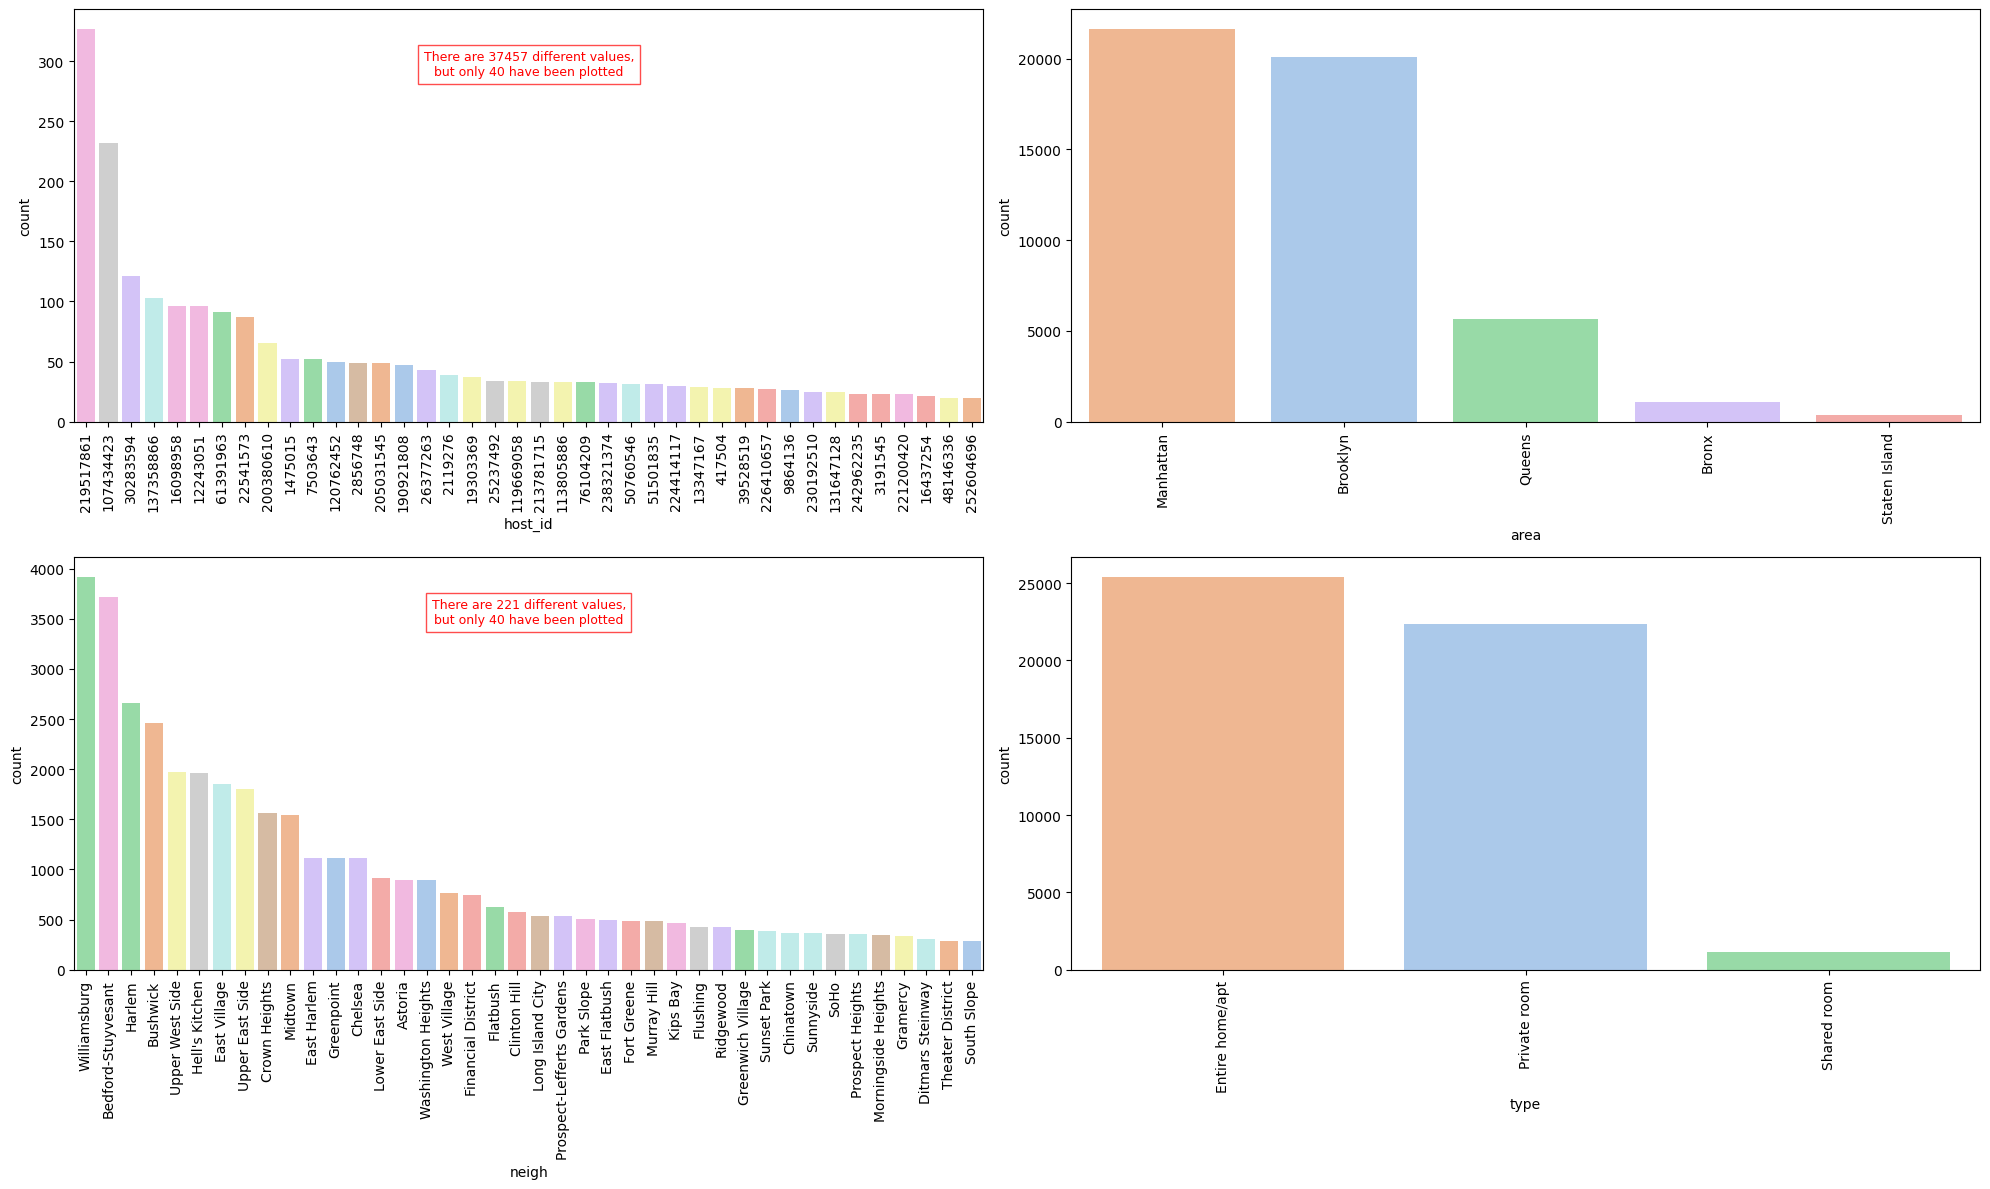

In [ ]:
# STEP 6) Univariable Analysis - CATEGORY Variables
# Number of different values to plot
n_diff_Values=40

# Define number of rows and columns
n_cols = 2
n_rows = math.ceil(len(category_var) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(figWidth_unit * n_cols, figHeight_unit * n_rows))
axes = axes.flatten()  # flatten the axes array for easier access

# Loop through categorical variables
idx = 0
for col in category_var:
    # Count unique values
    unique_count = df[col].nunique()
    
    # Limit the number of plotted categories if there are more than n_diff_Values
    if unique_count > n_diff_Values:
        order = df[col].value_counts().head(n_diff_Values).index
    else:
        order = df[col].value_counts().index
    
    # Create countplot
    sns.countplot(
        ax=axes[idx],data=df,x=col,hue=col,palette='pastel',
        order=order,
        legend=False
    ).tick_params(axis='x', rotation=90, labelsize=10)
    
    # Add text box if truncated
    if unique_count > n_diff_Values:
        axes[idx].text(
            0.5, 0.9,
            f"There are {unique_count} different values,\nbut only {n_diff_Values} have been plotted",
            transform=axes[idx].transAxes,
            fontsize=9,
            color='red',
            ha='center',
            va='top',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='red')
        )
    
    idx += 1

# Turn off unused axes if there are any
for j in range(idx, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

- Most of advertised apartment are in Manhattan and Brooklyn.
- Most of advertised apartment are private or entire appartment.

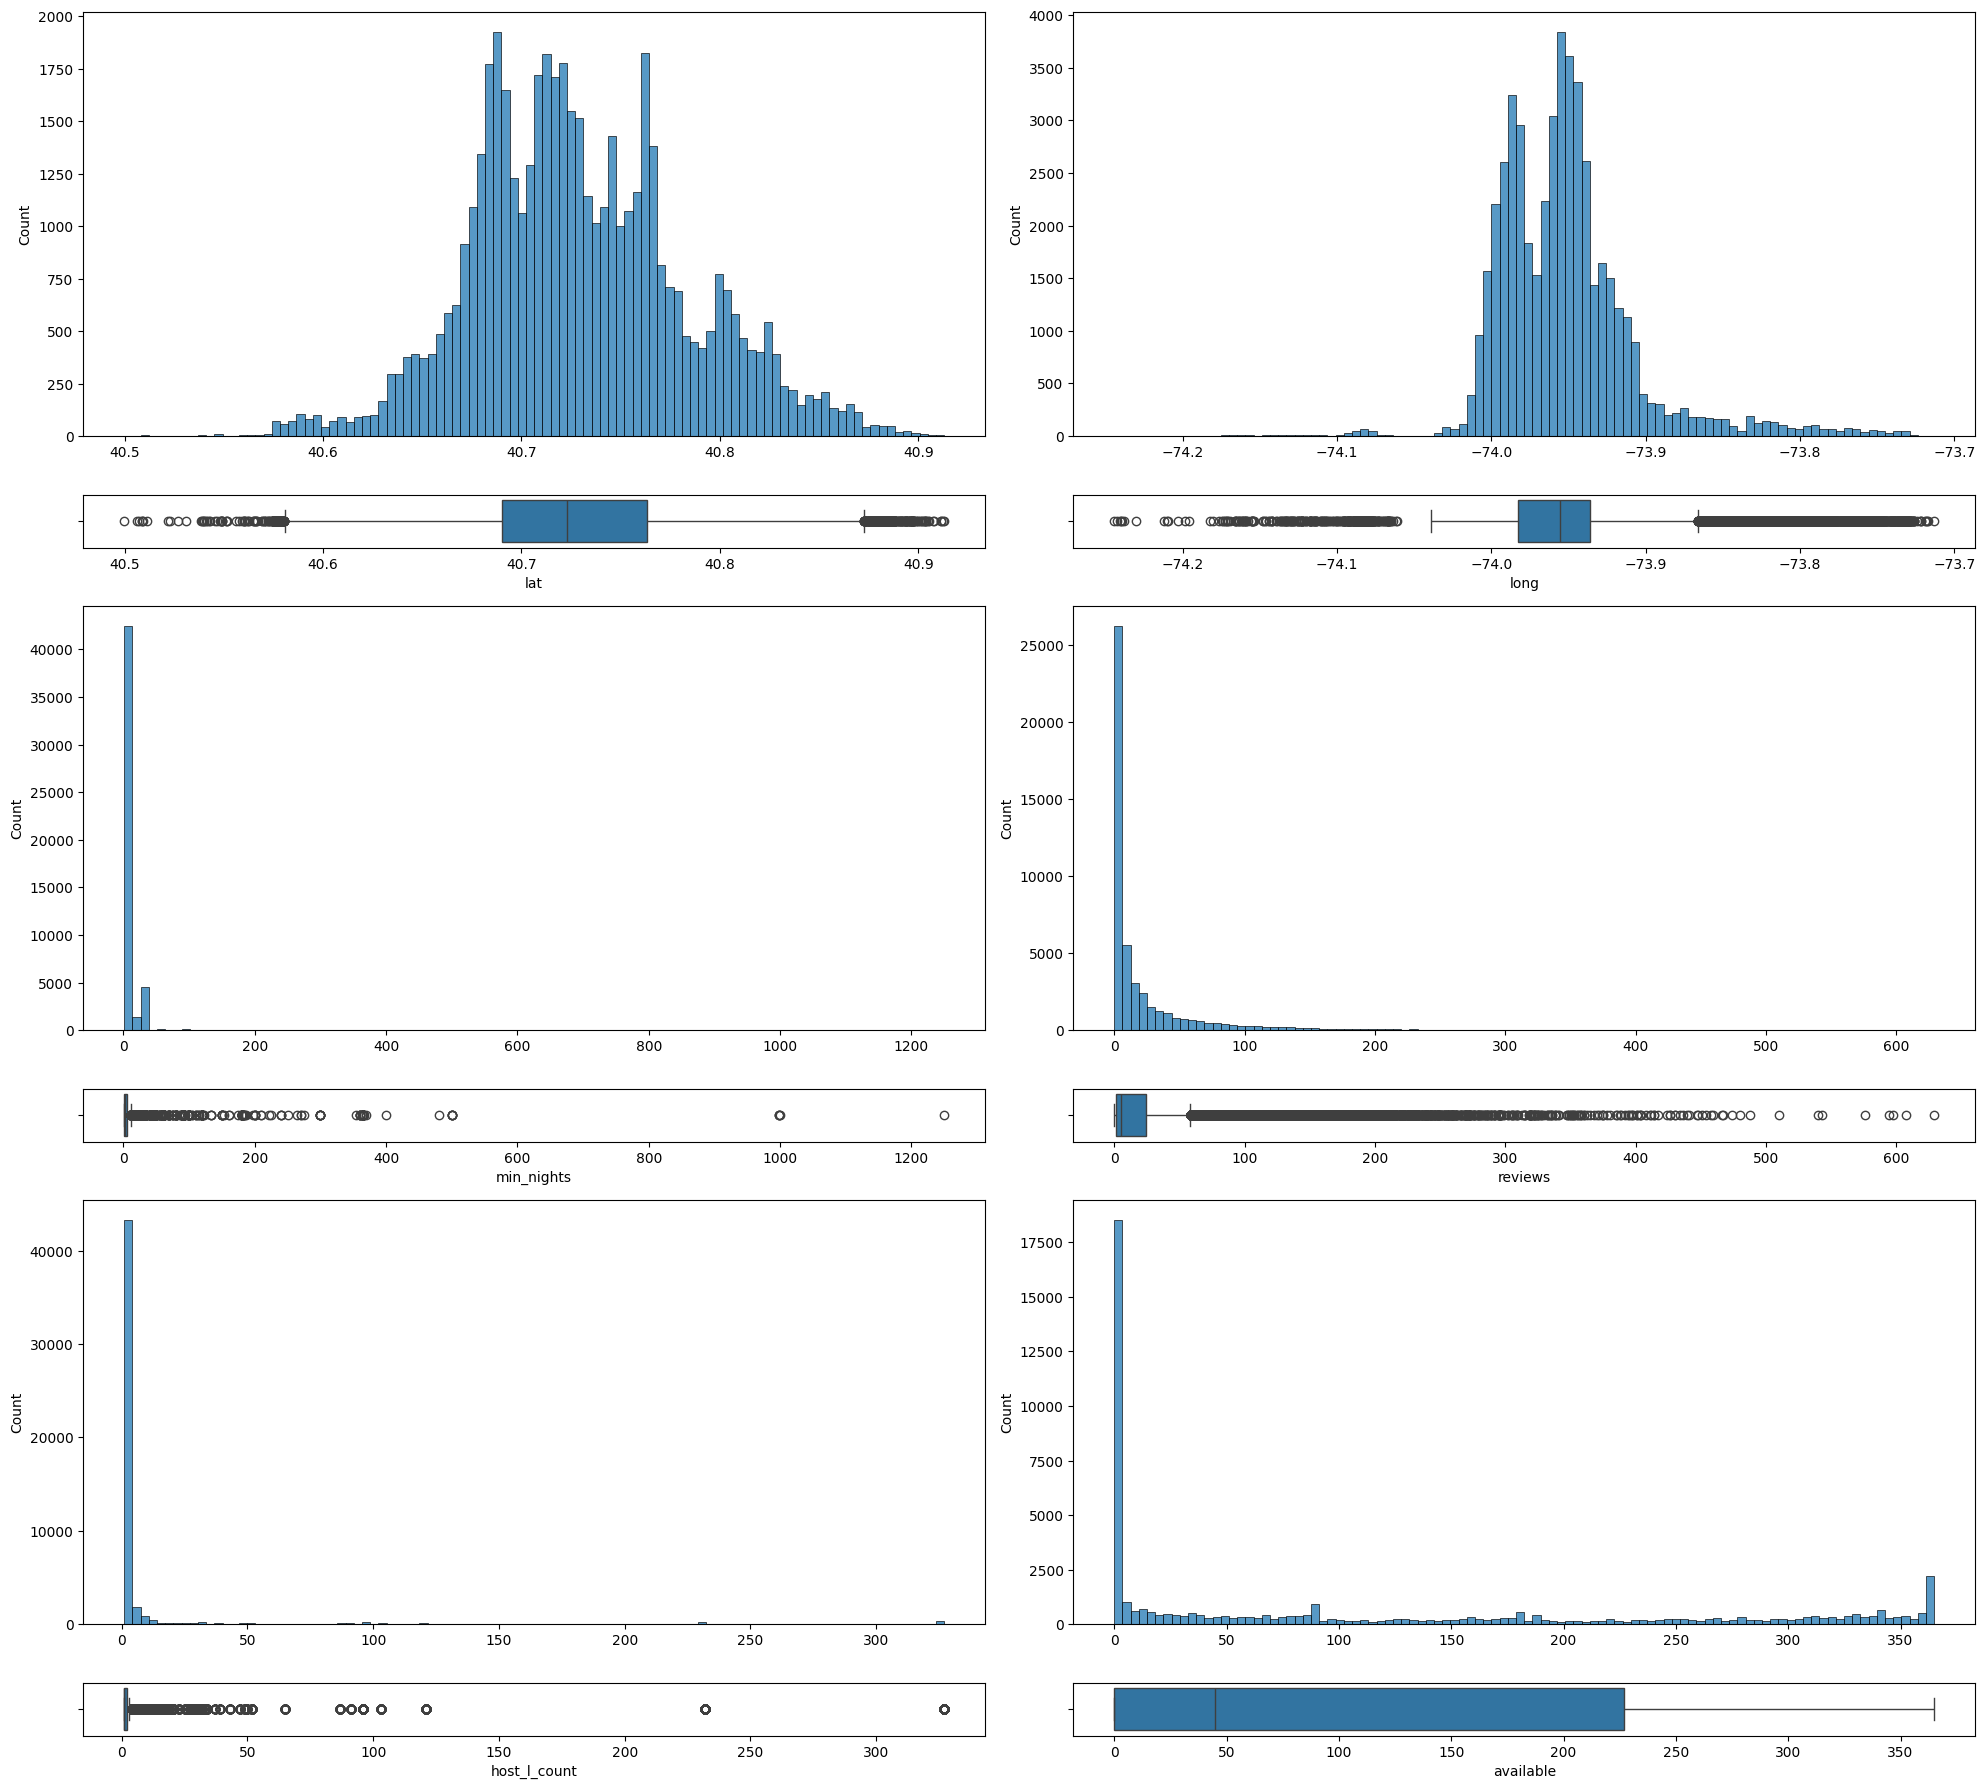

In [ ]:
# STEP 5.2) Univariable Analysis - NUMERIC Variables

#Define num of bins
bins=100

# Define number of columns and rows
n_cols = 2
n_rows = math.ceil(len(numerical_var) / n_cols)

# Create subplots with custom height ratios
fig, axes = plt.subplots(
    n_rows * 2, n_cols,
    figsize=(figWidth_unit * n_cols, figHeight_unit * n_rows),
    gridspec_kw={'height_ratios': [4, 0.5] * n_rows}
)

# Loop through variables
var_idx = 0
for row in range(n_rows):
    for col in range(n_cols):
        if var_idx >= len(numerical_var):
            # Hide unused subplots
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)
            continue

        var = numerical_var[var_idx]

        # Histogram (top)
        sns.histplot(ax=axes[row * 2, col], data=df, x=var, bins=bins).set_xlabel("")

        # Boxplot (bottom)
        sns.boxplot(ax=axes[row * 2 + 1, col], data=df, x=var)
        var_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()

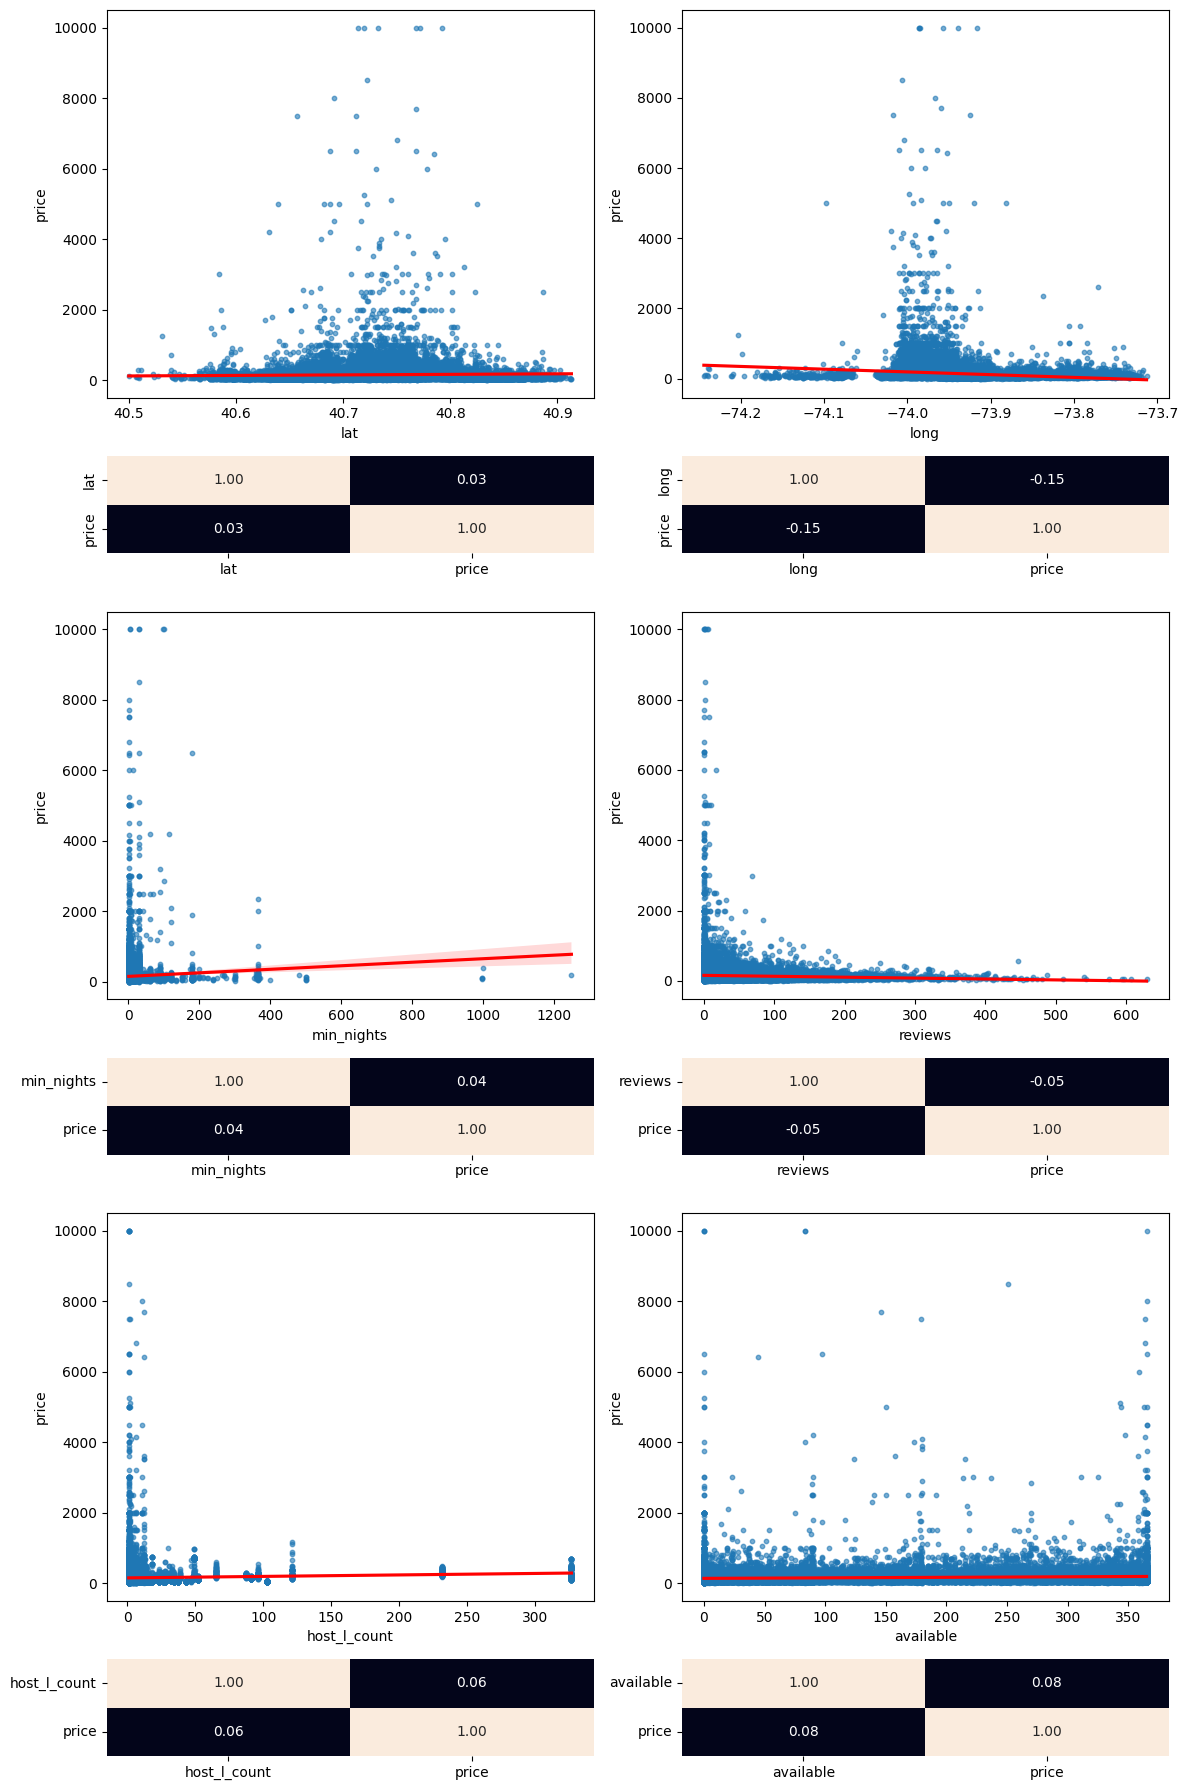

In [ ]:
# STEP 5.3) Multivariant Analysis - NUMERIC_var VS NUMERIC_target (Regplot + Heatmap)

# Define number of columns and rows (2 variables per row)
n_cols = 2
n_rows = math.ceil(len(numerical_var) / n_cols)

# Create subplots with custom height ratios
fig, axes = plt.subplots(
    n_rows * 2, n_cols,
    figsize=(figWidth_unit * n_cols, figHeight_unit * n_rows),
    gridspec_kw={'height_ratios': [4, 1] * n_rows}
)

# Loop through variables
var_idx = 0
for row in range(n_rows):
    for col in range(n_cols):
        if var_idx >= len(numerical_var):
            # Hide unused subplots
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)
            continue

        var = numerical_var[var_idx]

        # Regplot (top)
        sns.regplot(
            ax=axes[row * 2, col],
            data=df,
            x=var,
            y=y,
            scatter_kws={'s': 10, 'alpha': 0.6},
            line_kws={'color': 'red'})

        # Boxplot (bottom)
        sns.heatmap(ax = axes[row * 2 + 1, col], data = df[[var, y]].corr(), annot = True, fmt = ".2f", cbar = False)
        var_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# STEP 5.4) Multivariant Analysis - NUMERIC_var VS NUMERIC_target (Violin-plot)

if  df[y].nunique() > 5:
    print("Target variable " + y + " has to many different values (" + str(df[y].nunique()) + ") to draw violin graphs")
else:

    # Define number of columns and rows
    n_cols = 2
    n_rows = math.ceil(len(numerical_var) / n_cols)

    # Create subplots with custom height ratios
    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(figWidth_unit * n_cols, figHeight_unit * n_rows),
    )

    # Loop through variables
    var_idx = 0
    for row in range(n_rows):
        for col in range(n_cols):
            var = numerical_var[var_idx]

            # Violinplot
            sns.violinplot(ax=axes[row, col], data=df, x=y, y=var)
            var_idx += 1

    # Adjust layout
    plt.tight_layout()
    plt.show()

Target variable price has to many different values (674) to draw violin graphs


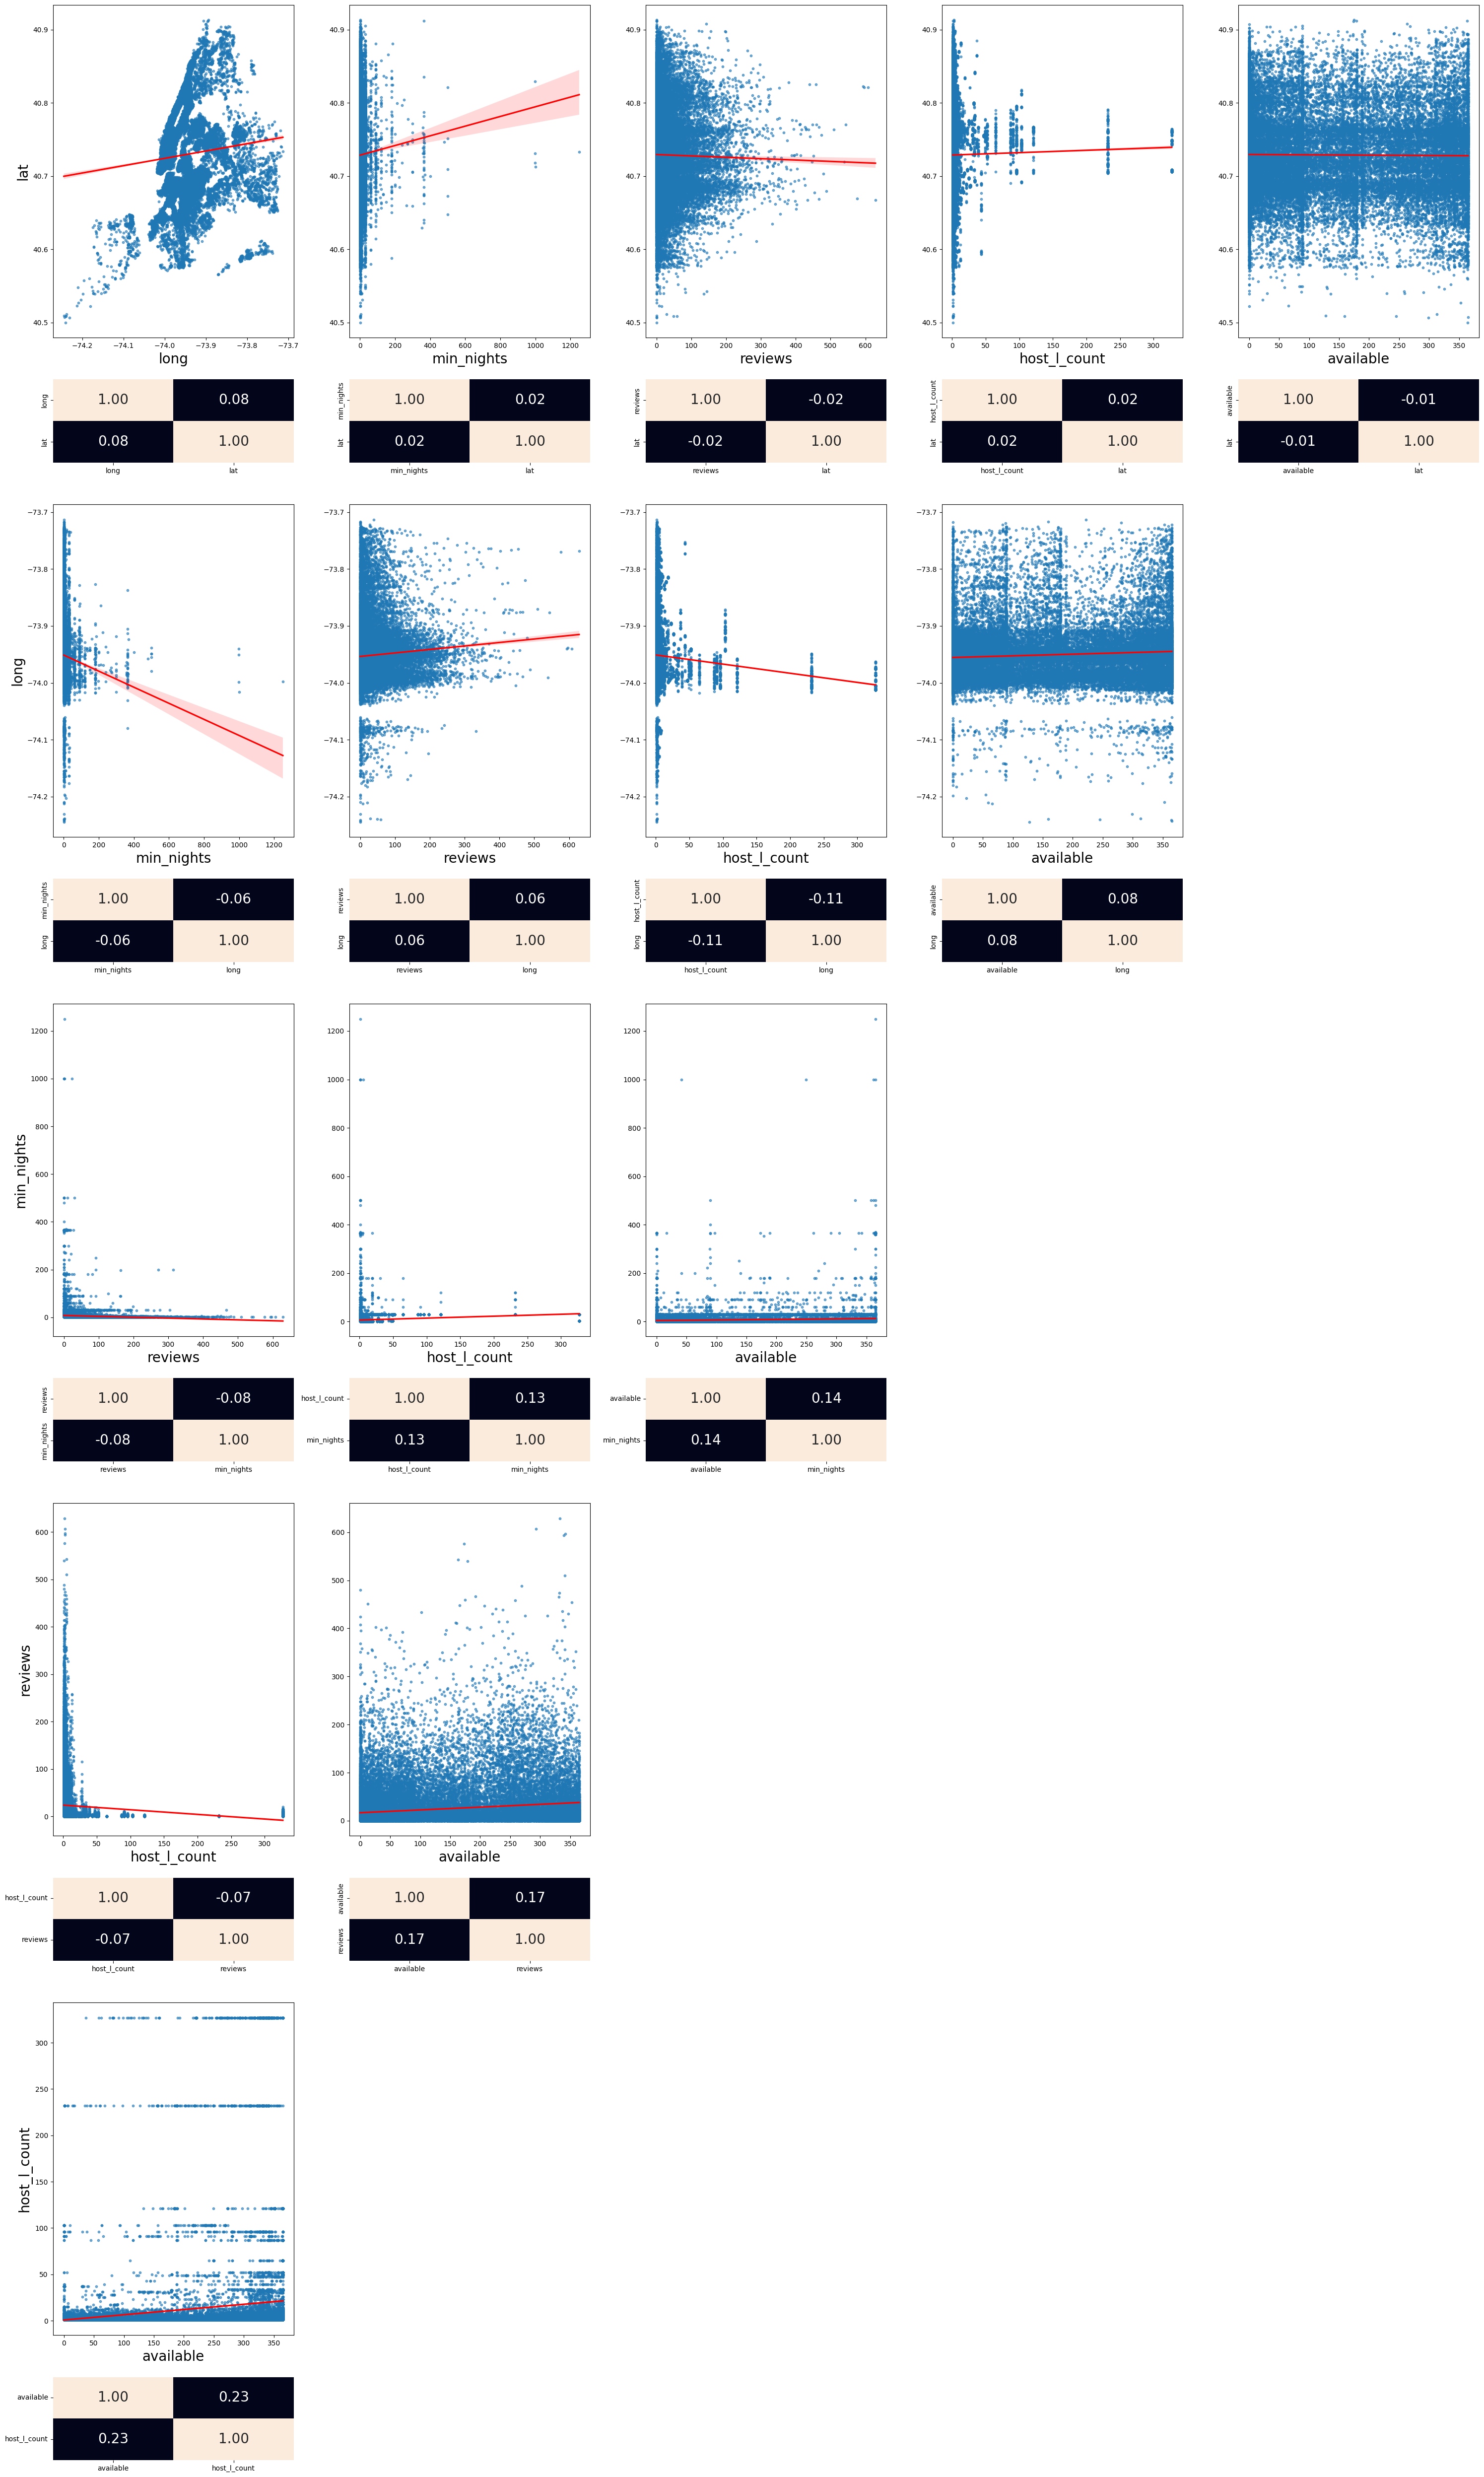

In [ ]:
# STEP 5.5) Multivariant Analysis - Triangular NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)
# Each row uses a fixed Y variable and crosses it with the following X variables

# Number of numeric variables
n_vars = len(numerical_var)

# Calculate total number of rows (one less than number of variables)
n_rows = n_vars - 1

# Create subplots with two stacked plots (regplot + heatmap) per variable pair
fig, axes = plt.subplots(
    n_rows * 2, n_vars - 1,
    figsize=(figWidth_unit * (n_vars - 1), figHeight_unit * n_rows),
    gridspec_kw={'height_ratios': [4, 1] * n_rows}
)

# Flatten axes for easy handling (still row × column structure)
axes = np.array(axes)

# Track subplot usage
for row in range(n_rows):
    y_var = numerical_var[row]               # fixed Y variable for this row
    n_cols = n_vars - row - 1               # decreasing number of columns each row

    for col in range(n_cols):
        x_var = numerical_var[row + col + 1]

        # Top: regplot
        sns.regplot(
            ax=axes[row * 2, col],
            data=df,
            x=x_var,
            y=y_var,
            scatter_kws={'s': 10, 'alpha': 0.6},
            line_kws={'color': 'red'}
        ).set_xlabel(x_var,fontsize=20)
        # Show Y label only for first plot in row
        if col == 0:
            axes[row * 2, col].set_ylabel(y_var,fontsize=20)
        else:
            axes[row * 2, col].set_ylabel("")

        # Bottom: heatmap (correlation)
        corr_val = df[[x_var, y_var]].corr()
        sns.heatmap(
            ax=axes[row * 2 + 1, col],
            data=corr_val,
            annot=True,
            fmt=".2f",
            cbar=False,
            annot_kws={"size": 20}
        )

    # Hide unused subplots on the right for this row
    for col in range(n_cols, n_vars - 1):
        axes[row * 2, col].set_visible(False)
        axes[row * 2 + 1, col].set_visible(False)

# Adjust layout and show
plt.tight_layout()
plt.show()


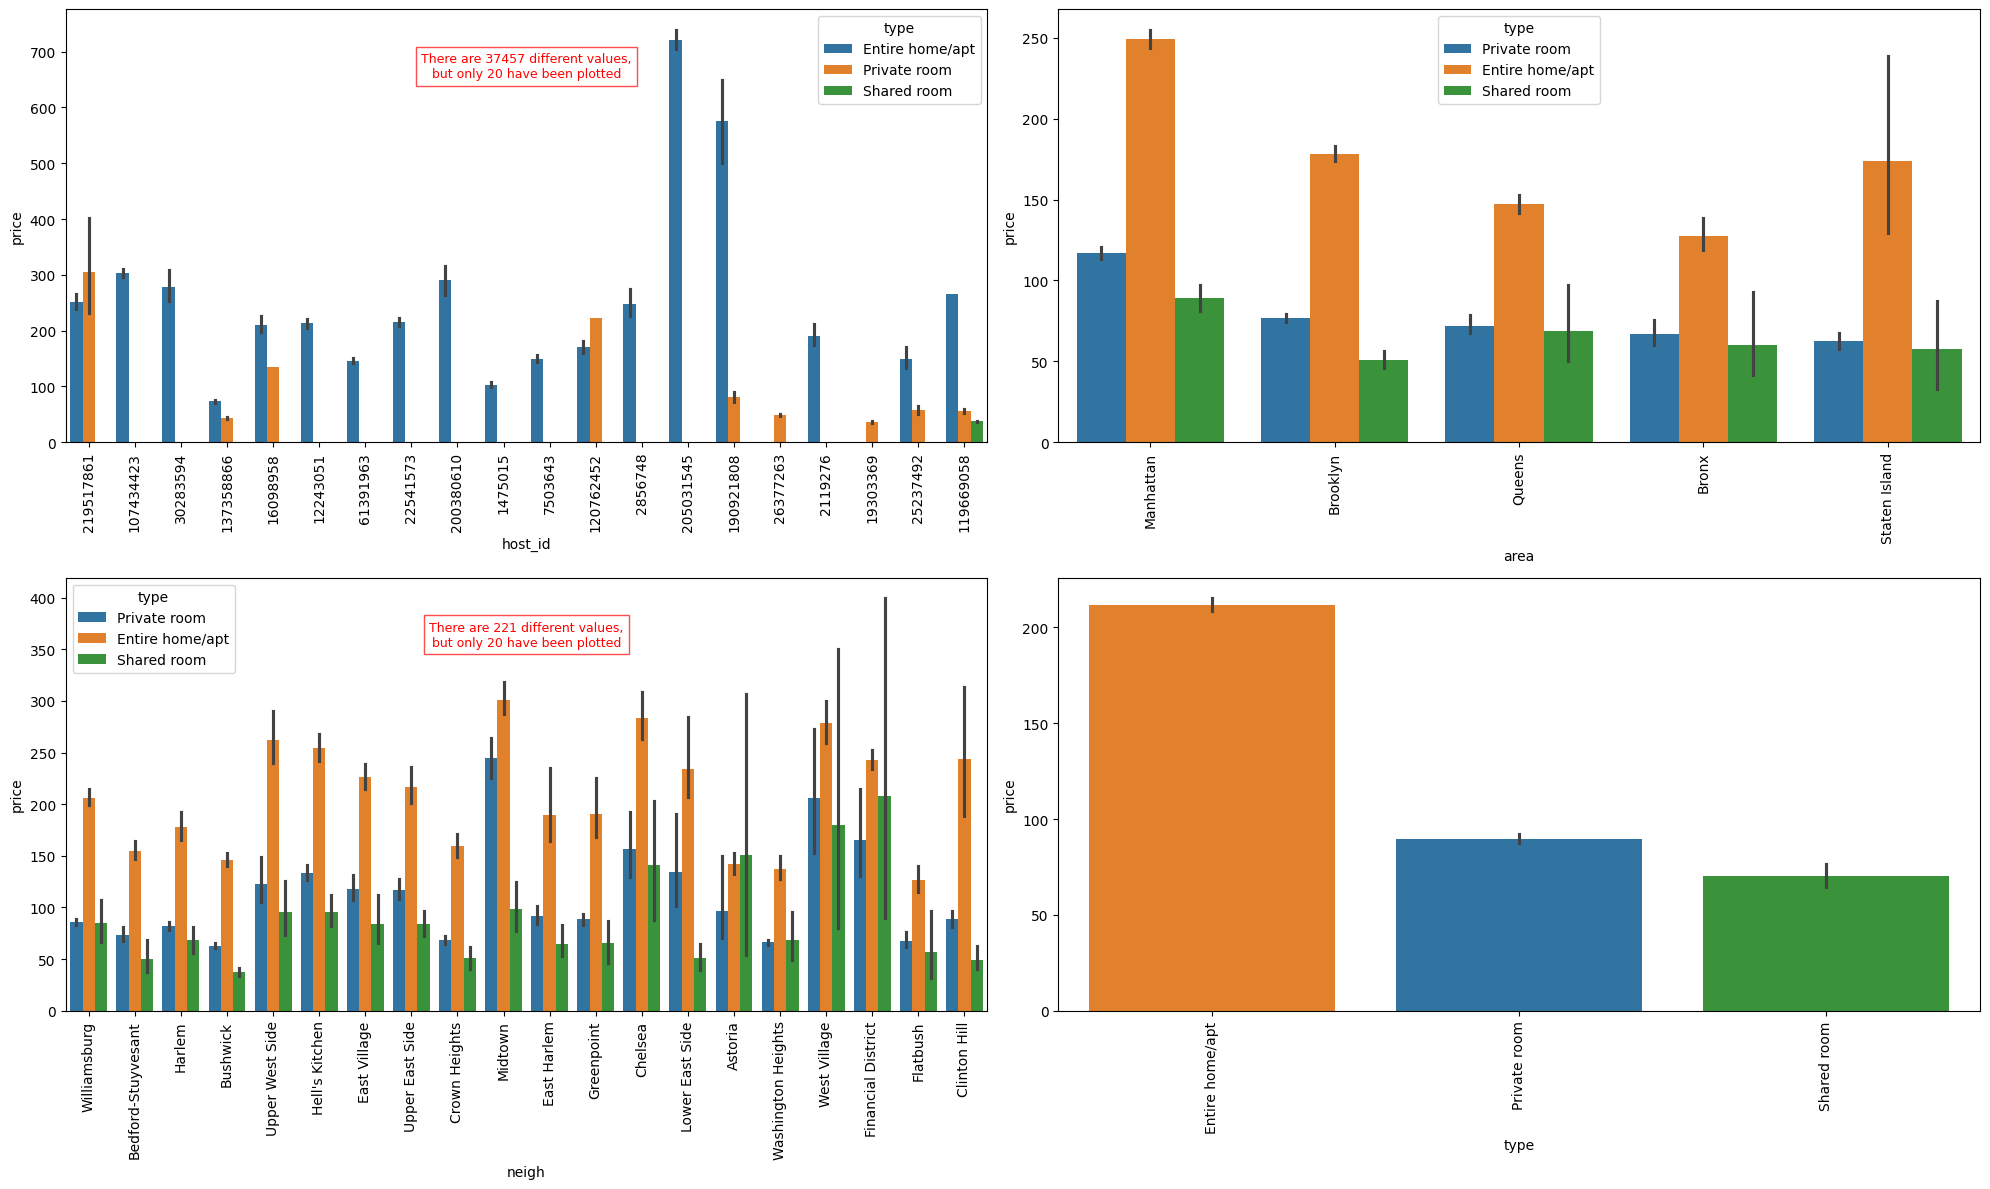

In [ ]:
# STEP 5.6) Multivariant Analysis - Combined CATEGORY_var VS NUMERIC_target (Barplot)
# Category var to combined
cat_var_comb="type"

# Number of different values to plot
n_diff_Values=20

# Define number of rows and columns
n_cols = 2
n_rows = math.ceil(len(category_var) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(figWidth_unit * n_cols, figHeight_unit * n_rows))
axes = axes.flatten()  # flatten the axes array for easier access

# Initialize manual counter
idx = 0

# Loop through categorical variables
for col in category_var:
    
    # Count unique values
    unique_count = df[col].nunique()
    
    # Limit the number of plotted categories if there are more than n_diff_Values
    if unique_count > n_diff_Values:
        order = df[col].value_counts().head(n_diff_Values).index
    else:
        order = df[col].value_counts().index
    
    # Create barplot
    sns.barplot(
        ax=axes[idx],
        data = df,
        x = col,
        y = y,
        hue = cat_var_comb,
        order=order,
        ).tick_params(axis='x', rotation=90, labelsize=10)
    
    # Add text box if truncated
    if unique_count > n_diff_Values:
        axes[idx].text(
            0.5, 0.9,
            f"There are {unique_count} different values,\nbut only {n_diff_Values} have been plotted",
            transform=axes[idx].transAxes,
            fontsize=9,
            color='red',
            ha='center',
            va='top',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='red')
        )
    
    idx += 1

# Turn off unused axes if there are any
for j in range(idx, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

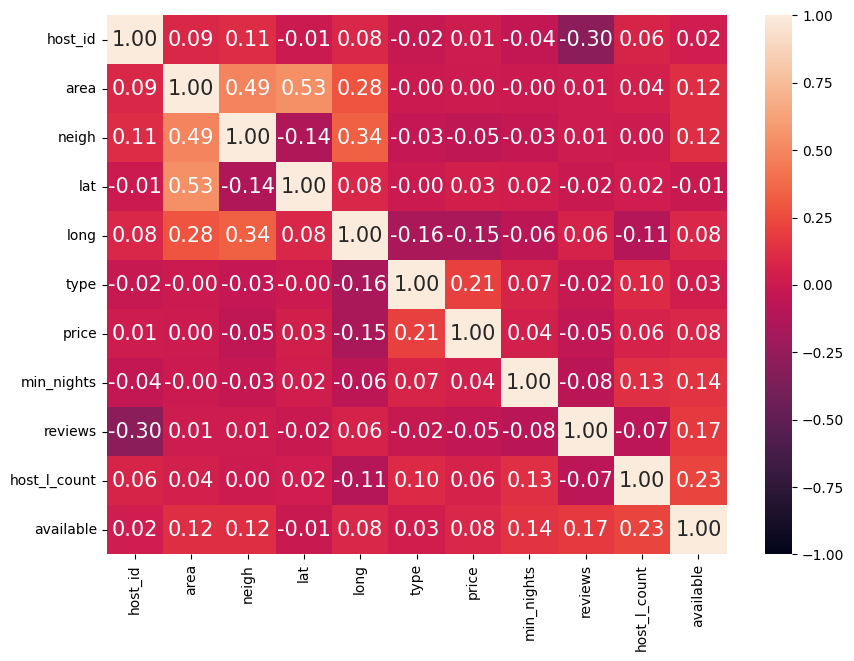

In [ ]:
# Make a copy to avoid modifying df
df_corr = df.copy()

# Encode categorical variables using the Series.factorize() method
for col in category_var:
    codes, uniques = df_corr[col].factorize()
    df_corr[col] = codes  # replace column with integer codes

plt.figure(figsize=(figWidth_unit,figHeight_unit))
sns.heatmap(
            data=df_corr.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            fmt=".2f",
            annot_kws={"size": 15}
        )
# Display
plt.show()

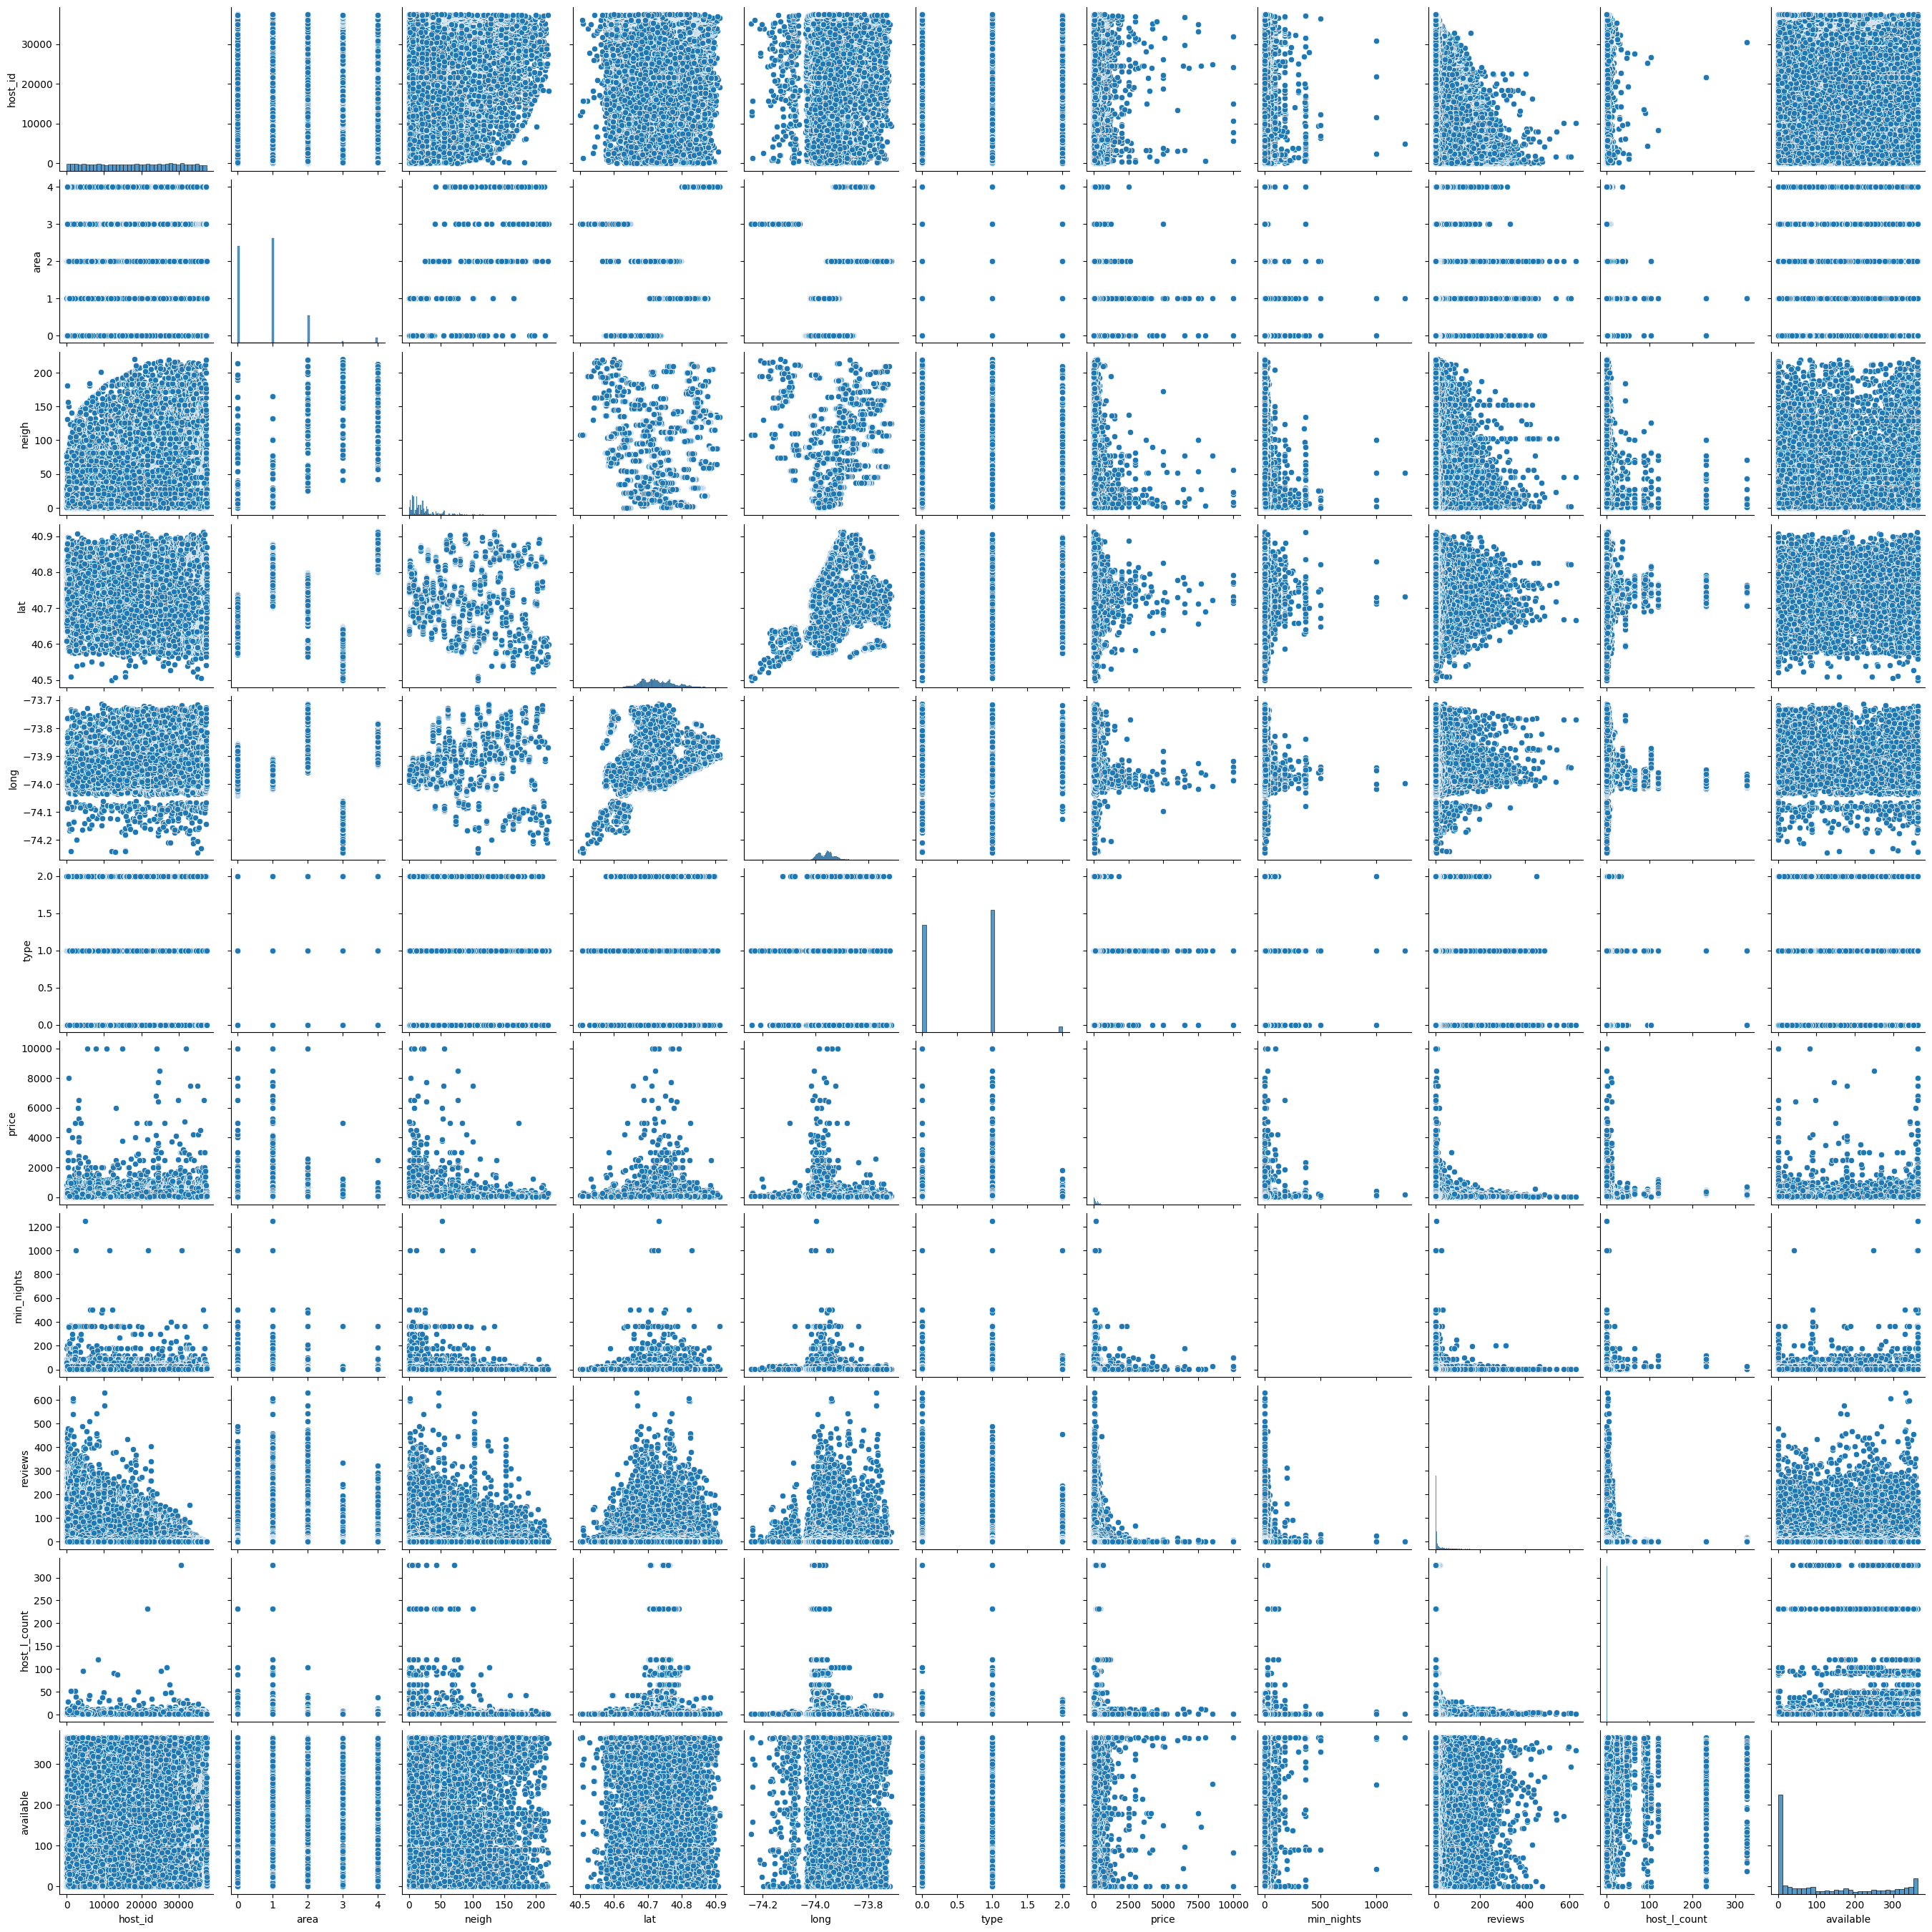

In [29]:
# relaciones todos con todos
sns.pairplot(data = df_corr)

# Display
plt.show()

In [30]:
# STEP 6) Outliers

df_corr.describe()

host_id          area         neigh           lat          long  \
count  48895.000000  48895.000000  48895.000000  48895.000000  48895.000000   
mean   18671.399857      0.786911     29.888782     40.728949    -73.952170   
std    10837.748916      0.844386     34.676634      0.054530      0.046157   
min        0.000000      0.000000      0.000000     40.499790    -74.244420   
25%     9185.500000      0.000000      7.500000     40.690100    -73.983070   
50%    18878.000000      1.000000     19.000000     40.723070    -73.955680   
75%    28062.500000      1.000000     37.000000     40.763115    -73.936275   
max    37456.000000      4.000000    220.000000     40.913060    -73.712990   

               type         price    min_nights       reviews  host_l_count  \
count  48895.000000  48895.000000  48895.000000  48895.000000  48895.000000   
mean       0.567113    152.720687      7.029962     23.274466      7.143982   
std        0.541249    240.154170     20.510550     44.550582     32.952519   
min        0.000000      0.000000      1.000000      0.000000      1.000000   
25%        0.000000     69.000000      1.000000      1.000000      1.000000   
50%        1.000000    106.000000      3.000000      5.000000      1.000000   
75%        1.000000    175.000000      5.000000     24.000000      2.000000   
max        2.000000  10000.000000   1250.000000    629.000000    327.000000   

          available  
count  48895.000000  
mean     112.781327  
std      131.622289  
min        0.000000  
25%        0.000000  
50%       45.000000  
75%      227.000000  
max      365.000000

It seems that price, min_nights, reviews, host_l_count and available  have their mean away from the 50% (percentil). And their max values seem not normal.

In [31]:
# Define unit figure sizes
figHeight_unit = 6
figWidth_unit = 10

# Define number of rows and columns
n_cols = 4
n_rows = math.ceil(len(df_corr) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(figWidth_unit * n_cols, figHeight_unit * n_rows))
axes = axes.flatten()  # flatten the axes array for easier access

# Loop through variables
var_idx = 0
for row in range(n_rows):
    for col in range(n_cols):
        if var_idx >= len(df_corr):
            # Hide unused subplots
            axes[row, col].set_visible(False)
            continue

        var = numerical_var[var_idx]

        # Histogram (top)
        sns.histplot(ax=axes[row * 2, col], data=df, x=var, bins=bins).set_xlabel("")

        # Boxplot (bottom)
        sns.boxplot(ax=axes[row * 2 + 1, col], data=df, x=var)
        var_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()





fig, axis = plt.subplots(3, 3, figsize = (10, 8))

sns.boxplot(ax = axis[0, 0], data = df_corr, y = "host_id")
sns.boxplot(ax = axis[0, 1], data = df_corr, y = "area")
sns.boxplot(ax = axis[0, 2], data = df_corr, y = "neigh")
sns.boxplot(ax = axis[1, 0], data = df_corr, y = "lat")
sns.boxplot(ax = axis[1, 1], data = df_corr, y = "long")
sns.boxplot(ax = axis[1, 2], data = df_corr, y = "type")
sns.boxplot(ax = axis[2, 0], data = df_corr, y = "price")
sns.boxplot(ax = axis[2, 1], data = df_corr, y = "min_nights")
sns.boxplot(ax = axis[2, 1], data = df_corr, y = "reviews")
sns.boxplot(ax = axis[2, 1], data = df_corr, y = "host_l_count")
sns.boxplot(ax = axis[2, 1], data = df_corr, y = "available")

fig.delaxes(axis[2, 2])
plt.tight_layout()

plt.show()

: 

In [1]:
len(df_corr)

NameError: name 'df_corr' is not defined